## 1st Request

In [3]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
url = "http://books.toscrape.com/"

In [5]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [7]:
type(soup)

bs4.BeautifulSoup

In [9]:
books_html = soup.find_all("article", class_="product_pod")
len(books_html)

20

## Parsing _one_ book

In [31]:
type(books_html)

bs4.element.ResultSet

In [32]:
books_html[0].find("h3").find("a")

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [33]:
books_html[0].find("h3").find("a").attrs

{'href': 'catalogue/a-light-in-the-attic_1000/index.html',
 'title': 'A Light in the Attic'}

In [34]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

In [41]:
books_html[0].find("p", class_="price_color").string

'Â£51.77'

In [43]:
book_price = float(books_html[0].find("p", class_="price_color").string[2:])
book_price

51.77

In [44]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [45]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [49]:
def parse_rating(rating_classes):
    """
    Parses the rating classes and returns the rating

    Parameters
    ----------
    rating_classes : str
        The rating classes of the book: these are the classes of the stars element in the HTML.
    
    Examples
    --------
    >>> rating_classes = [ 'star-rating', 'Three' ]
    >>> parse_rating(rating_classes)
    3
    """
    #  Define the ratings: mapping from English to numerical
    ratings = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
    for rating in ratings:
        if rating in rating_classes:
            return ratings[rating] # Found the rating, return the numerical value

In [50]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])

## Parsing _all_ books

In [51]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

In [52]:
for book in books_html:
    title = book.find("h3").find("a").attrs['title']
    price = book.find("p", class_="price_color").text[2:]
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])

    # Append the book information to the dictionary
    books_dict['Title'].append(title)
    books_dict['Price'].append(price)
    books_dict['Rating'].append(rating)


In [53]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': ['51.77',
  '53.74',
  '50.10',
  '47.82',
  '54.23',
  '22.65',
  '33.34',
  '17.93',
  '22.60',
  '52.15',
  '13.99',
  '20.66',
  '17.46',
  '52.29',


In [54]:
len(books_dict)

3

In [56]:
len(books_dict["Title"])

20

In [57]:
books_df = pd.DataFrame(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<Axes: xlabel='Rating'>

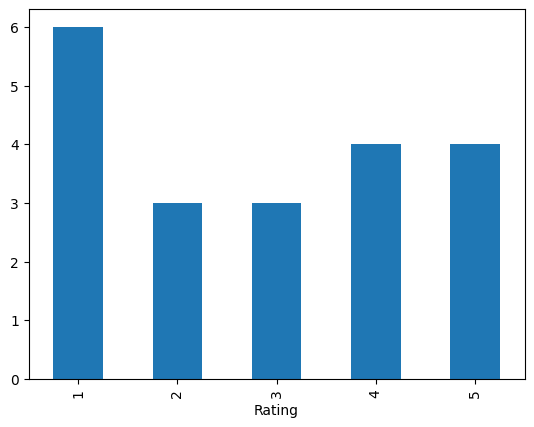

In [58]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [59]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())